In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Basic dataset information
print("Training Dataset Shape:", train_df.shape)
print("Test Dataset Shape:", test_df.shape)

# Missing values comparison
missing_values = pd.DataFrame({
    'Train': train_df.isnull().sum(),
    'Test': test_df.isnull().sum()
})

Training Dataset Shape: (93686, 3)
Test Dataset Shape: (31229, 3)


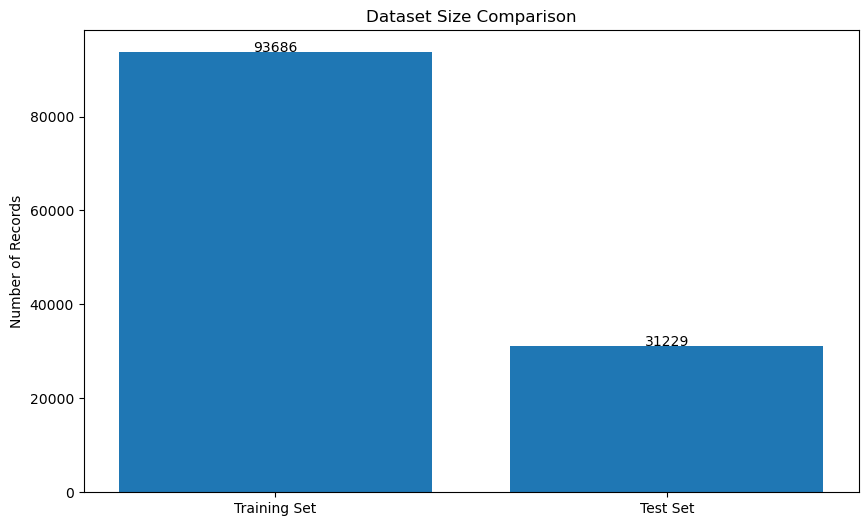

In [2]:
# Create dataset size comparison plot
plt.figure(figsize=(10, 6))
sizes = [len(train_df), len(test_df)]
labels = ['Training Set', 'Test Set']
plt.bar(labels, sizes)
plt.title('Dataset Size Comparison')
plt.ylabel('Number of Records')
for i, v in enumerate(sizes):
    plt.text(i, v, str(v), ha='center')
plt.show()

<Figure size 1500x800 with 0 Axes>

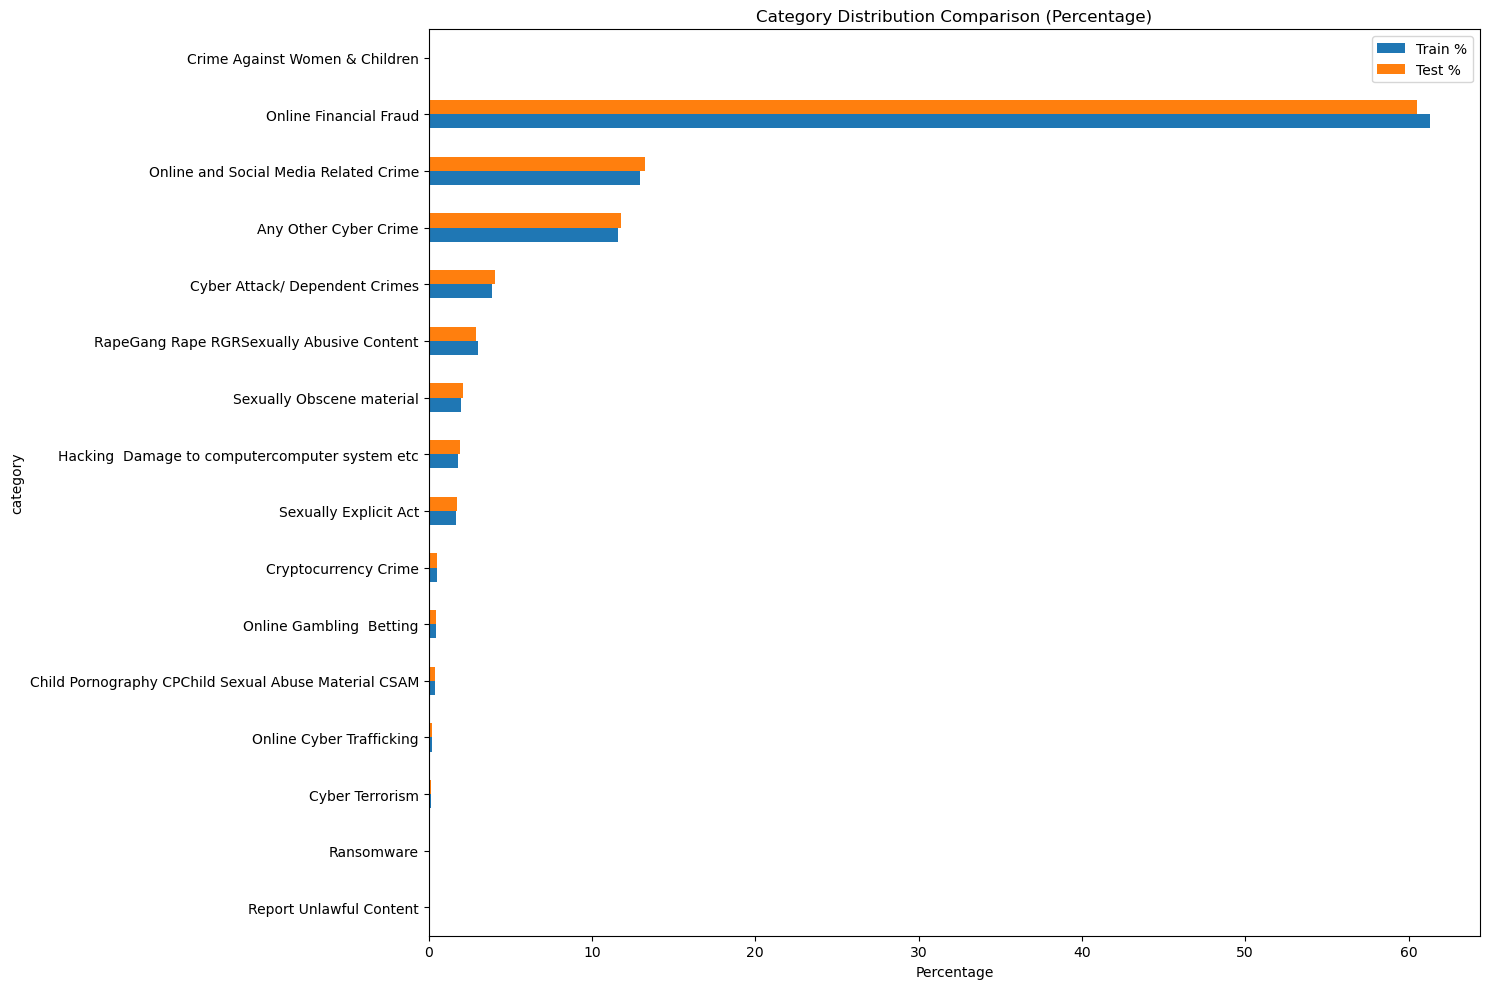

In [4]:
# Compare category distributions
plt.figure(figsize=(15, 8))
train_cats = train_df['category'].value_counts()
test_cats = test_df['category'].value_counts()

# Create percentage comparison
train_pct = (train_cats / len(train_df)) * 100
test_pct = (test_cats / len(test_df)) * 100

# Plot side by side bars
comparison_df = pd.DataFrame({
    'Train %': train_pct,
    'Test %': test_pct
}).sort_values('Train %', ascending=True)

comparison_df.plot(kind='barh', figsize=(15, 10))
plt.title('Category Distribution Comparison (Percentage)')
plt.xlabel('Percentage')
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

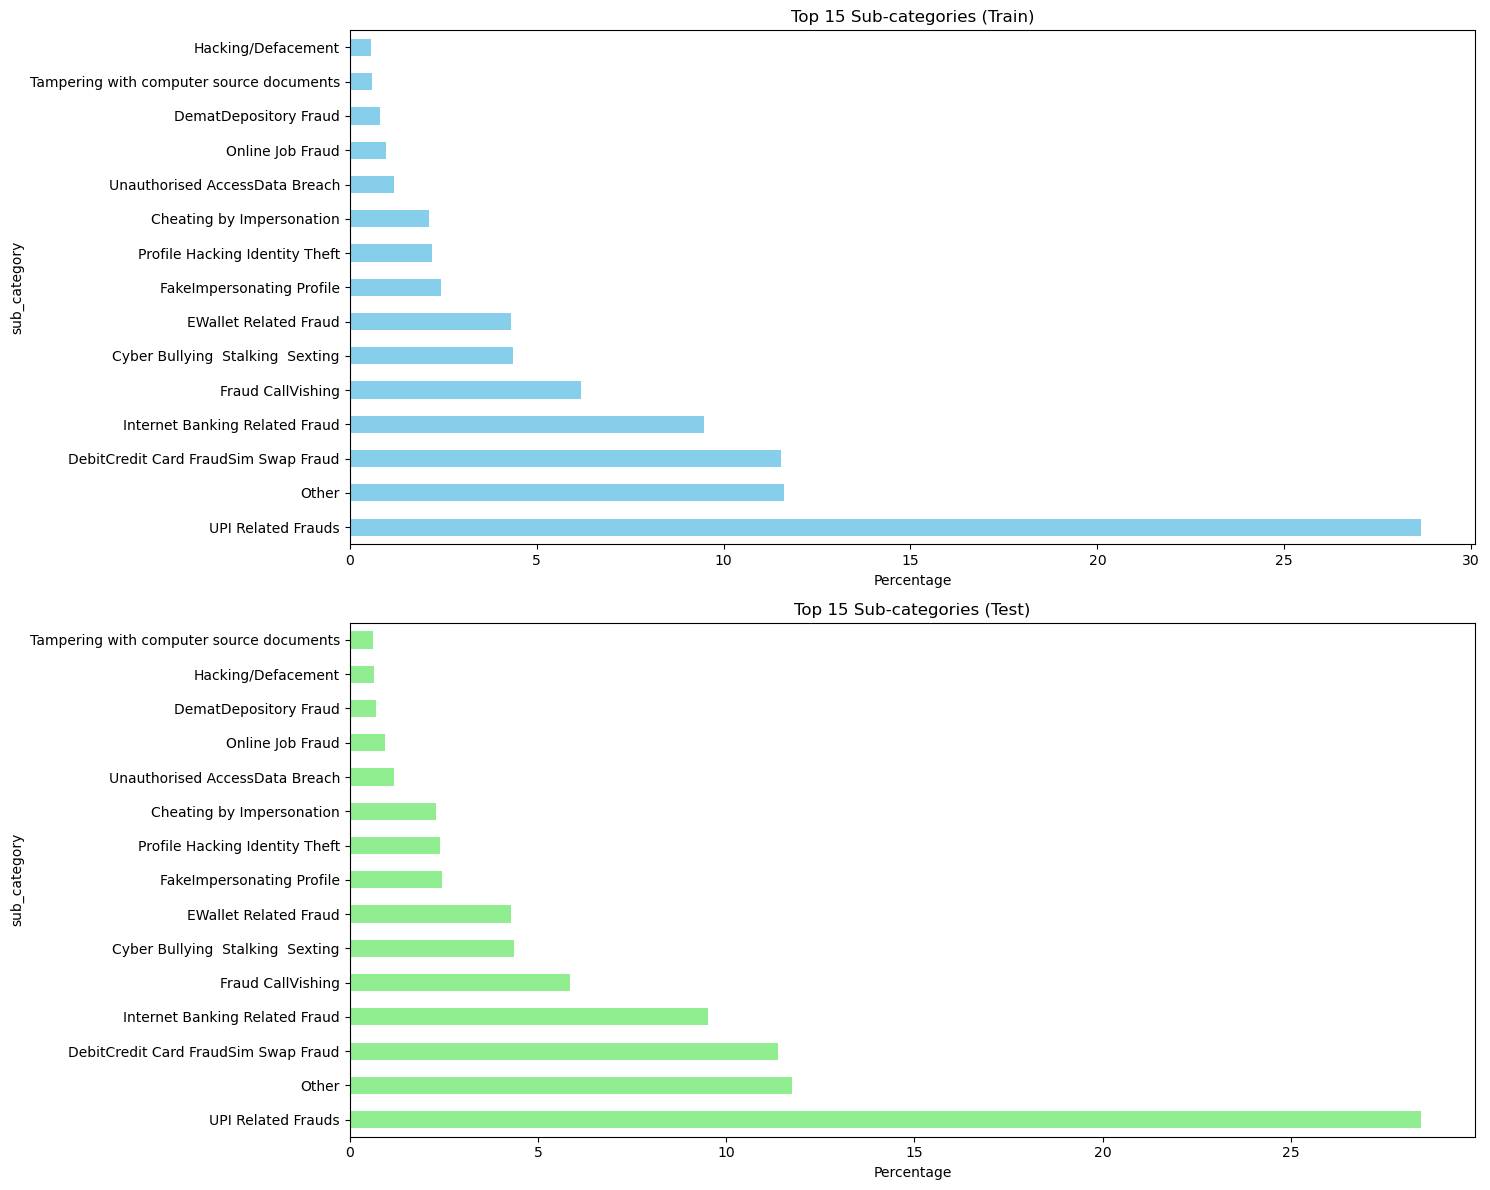

In [5]:
# Compare top 15 sub-categories
plt.figure(figsize=(15, 10))
train_subs = train_df['sub_category'].value_counts().head(15)
test_subs = test_df['sub_category'].value_counts().head(15)

# Create percentage comparison
train_subs_pct = (train_subs / len(train_df)) * 100
test_subs_pct = (test_subs / len(test_df)) * 100

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

train_subs_pct.plot(kind='barh', ax=ax1, color='skyblue')
ax1.set_title('Top 15 Sub-categories (Train)')
ax1.set_xlabel('Percentage')

test_subs_pct.plot(kind='barh', ax=ax2, color='lightgreen')
ax2.set_title('Top 15 Sub-categories (Test)')
ax2.set_xlabel('Percentage')

plt.tight_layout()
plt.show()

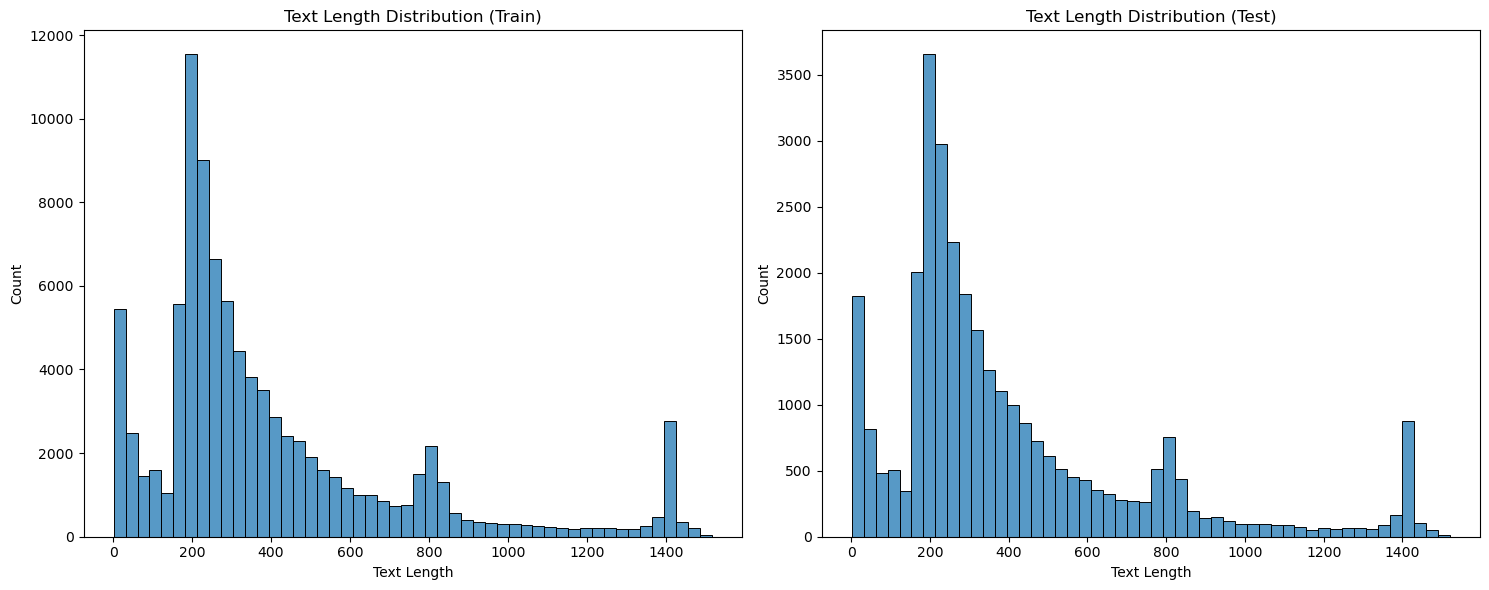


Text Length Statistics:
          Train      Test
count  93665.00  31222.00
mean     398.37    399.15
std      329.30    326.92
min        1.00      1.00
25%      199.00    199.00
50%      284.00    288.00
75%      494.00    496.00
max     1517.00   1521.00


In [6]:
# Calculate text lengths
train_df['text_length'] = train_df['crimeaditionalinfo'].str.len()
test_df['text_length'] = test_df['crimeaditionalinfo'].str.len()

# Create text length distribution comparison
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='text_length', bins=50)
plt.title('Text Length Distribution (Train)')
plt.xlabel('Text Length')

plt.subplot(1, 2, 2)
sns.histplot(data=test_df, x='text_length', bins=50)
plt.title('Text Length Distribution (Test)')
plt.xlabel('Text Length')

plt.tight_layout()
plt.show()

# Text length statistics
text_stats = pd.DataFrame({
    'Train': train_df['text_length'].describe(),
    'Test': test_df['text_length'].describe()
}).round(2)
print("\nText Length Statistics:")
print(text_stats)

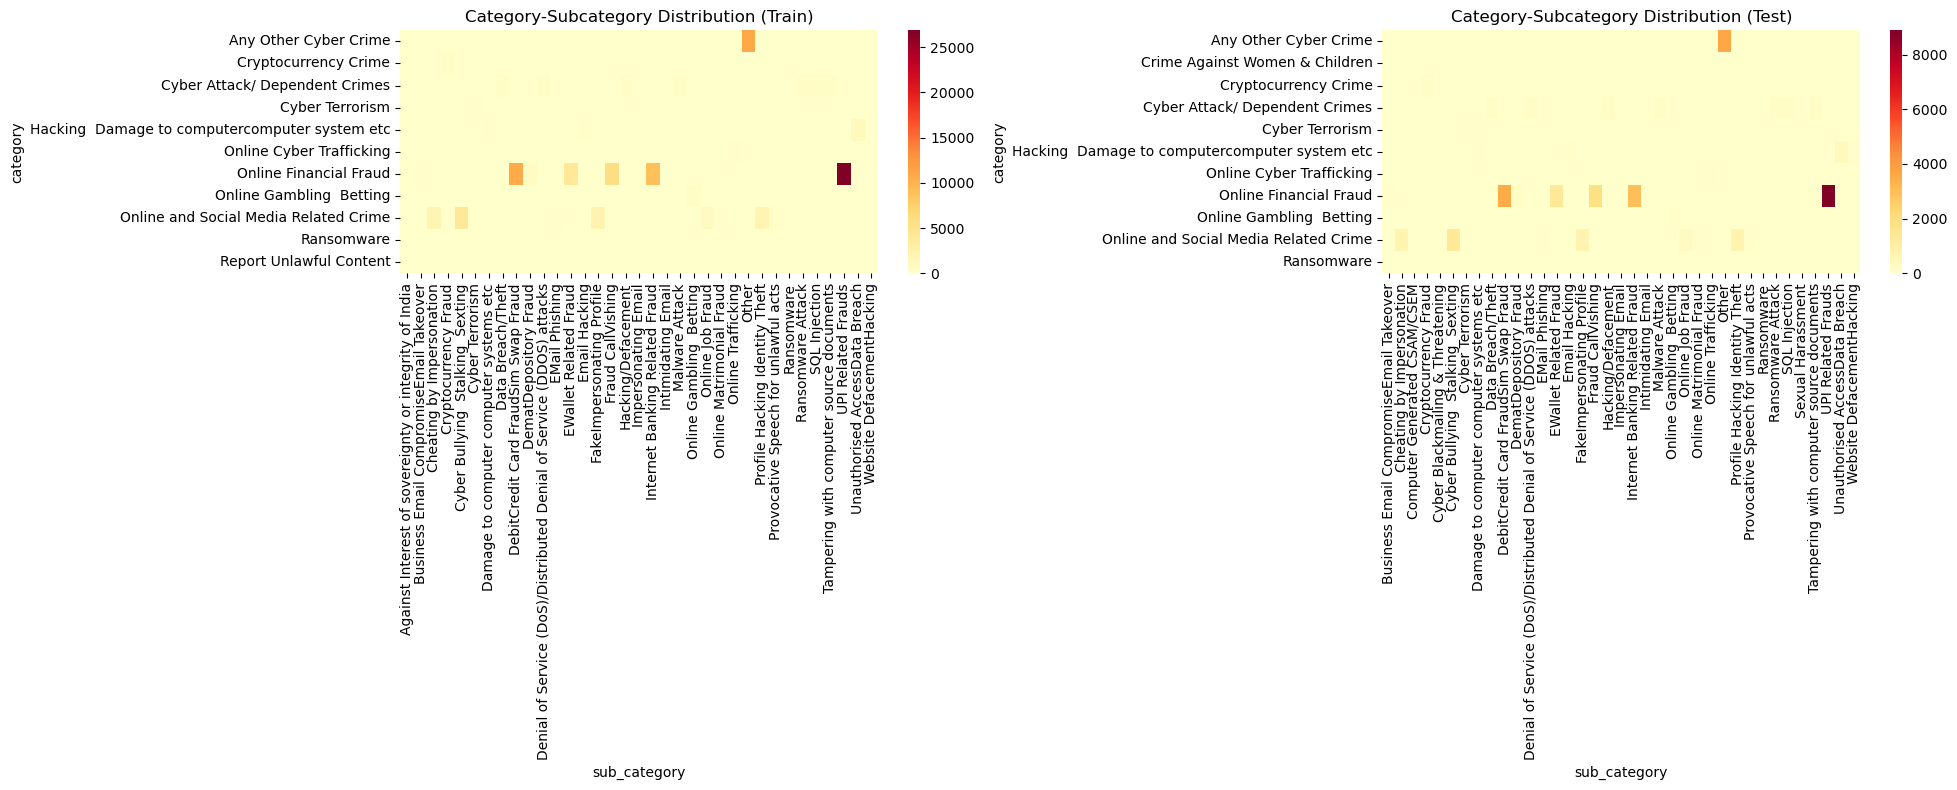

In [7]:
# Create heatmaps for category-subcategory relationships
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
train_heatmap = pd.crosstab(train_df['category'], train_df['sub_category'])
sns.heatmap(train_heatmap, cmap='YlOrRd', xticklabels=True, yticklabels=True)
plt.title('Category-Subcategory Distribution (Train)')

plt.subplot(1, 2, 2)
test_heatmap = pd.crosstab(test_df['category'], test_df['sub_category'])
sns.heatmap(test_heatmap, cmap='YlOrRd', xticklabels=True, yticklabels=True)
plt.title('Category-Subcategory Distribution (Test)')

plt.tight_layout()
plt.show()

In [8]:
print("\nUnique Categories:")
print("Train:", train_df['category'].nunique())
print("Test:", test_df['category'].nunique())

print("\nUnique Sub-categories:")
print("Train:", train_df['sub_category'].nunique())
print("Test:", test_df['sub_category'].nunique())

# Create comparison table of top categories
category_comparison = pd.DataFrame({
    'Train Count': train_cats,
    'Train %': train_pct,
    'Test Count': test_cats,
    'Test %': test_pct
}).round(2)

print("\nCategory Distribution Comparison:")
print(category_comparison)


Unique Categories:
Train: 15
Test: 15

Unique Sub-categories:
Train: 35
Test: 37

Category Distribution Comparison:
                                                    Train Count  Train %  \
category                                                                   
Any Other Cyber Crime                                   10878.0    11.61   
Child Pornography CPChild Sexual Abuse Material...        379.0     0.40   
Crime Against Women & Children                              NaN      NaN   
Cryptocurrency Crime                                      480.0     0.51   
Cyber Attack/ Dependent Crimes                           3608.0     3.85   
Cyber Terrorism                                           161.0     0.17   
Hacking  Damage to computercomputer system etc           1710.0     1.83   
Online Cyber Trafficking                                  183.0     0.20   
Online Financial Fraud                                  57434.0    61.30   
Online Gambling  Betting                       